![banner](../../src/visuals/banner.png)

# Why is it Called Deep Learning?

Like we had talked about before, the word "Deep" comes from the fact that there are multiple layers of calculations that happen. The problem is, if our model becomes too deep, we are not able to optimize it anymore! 

Uptil now we have almost completely ignored the "why" or "how" backpropagation works so lets take a look now. Couple of things to keep in mind before we get into this. If this doesn't make that much sense (or even if it does beacuse its incredible) please watch the following couple of videos by **3Blue1Brown**!!

- [**What is a Neural Network**](https://www.youtube.com/watch?v=aircAruvnKk)
- [**Gradient Descent, How Neural Networks Learn**](https://www.youtube.com/watch?v=IHZwWFHWa-w)
- [**What is backpropagation really doing?**](https://www.youtube.com/watch?v=IHZwWFHWa-w)

If you watch these videos and intuitively understand whats going on, that should give you a pretty good foundation for everything else! The math you need to know to better understand this next part is really just one thing: **Chain Rule!!** This is probably also the most math you will see for our introductory stuff, there is obviously a lot more when we get into our more advanced topics later but dont let this scare you away!

### Chain Rule Recap

Let $f(y) = y^2$ and $g(x) = 3x + 2$. Then $f(g(x)) = (3x+2)^2$. Now if we want to take the derivative of the function with respect to x, the problem is that x is composed in a function composed inside another function! This is exactly what the chain rule was made for :

$$\frac{df}{dx} = \frac{df}{dg}\frac{dg}{dx} = 2 * (3x+2)*\frac{dg}{dx} = 2(3x+2)(3) = 6(3x+2)$$

### BackPropagation on an Easy Neural Network
Lets take this basic example to see hwo backpropagation works:

![easynet](../../src/visuals/easynet.png)

This model has 3 inputs $[x_1, x_2, x_3]$, a single hidden layer with 2 nodes, and a single output. The loss we will use is our standard regression loss Mean squared error!


Lets break this neural network up into all its components:

$$Loss = L = \frac{1}{N}(y_{true} - y_{pred})^2$$

We can now write the expression for $y_{pred}$ based on the two previous nodes $[h_1, h_2]$ and their respective weights $[w_1^{[2]}, w_2^{[2]}]$

$$y_{pred} = h_1*w_1^{[2]} + h_2*w_2^{[2]}$$

We can now write a out the expression for $[h_1, h_2]$ given the inputs $[x_1, x_2, x_3]$ and the weights $[w_1^{[1]}, w_2^{[1]}, w_3^{[1]}, w_4^{[1]}, w_5^{[1]}, w_6^{[1]}]$

$$h_1 = x_1*w_1^{[1]} + x_2*w_3^{[1]} + x_3*w_5^{[1]}$$

$$h_2 = x_1*w_2^{[1]} + x_2*w_4^{[1]} + x_3*w_6^{[1]}$$

As we can see, we have a bunch of compositions of fuctions here! Therefore we know **Chain Rule** will come into play somewhere. As we know, our goal is to minimize our Mean Squared Error Loss $L$. So lets start at the end of the network and work our way back! The variable is $y_{pred}$ and we want to take the derivative of this loss with respect to this variable

$$\frac{dL}{dy_{pred}} = -\frac{2}{N}(y_{true} - y_{pred})$$

The problem is, we can't really control $y_{pred}$ directly, and our only way to make a change is through our two weight parameters $[w_1^{[2]}, w_2^{[2]}]$. In that case, lets take the derivative of $L$ with respect to the first of these weights $w_1^{[2]}$

$$\frac{dL}{dw_1^{[2]}} = \frac{dL}{dy_{pred}}\frac{dy_{pred}}{dw_1^{[2]}}$$

$$\frac{dL}{dy_{pred}} \text{ was calculated previously}$$

$$\frac{dy_{pred}}{dw_1^{[2]}} = \frac{d(h_1*w_1^{[2]} + h_2*w_2^{[2]})}{dw_1^{[2]}} = h_1$$

$$\therefore \frac{dL}{dw_1^{[2]}} = -\frac{2h_1}{N}(y_{true} - y_{pred}) $$

And similarly:
$$\frac{dL}{dw_2^{[2]}} = -\frac{2h_2}{N}(y_{true} - y_{pred}) $$

Great! We did backpropagation for just one layer... Now another one!!

Lets take the derivative of $L$$$\frac{dL}{dw_1^{[1]}} = \frac{dL}{dy_{pred}}\frac{dy_{pred}}{dh_1}\frac{dh_1}{dw_1^{[1]}}$$

$$\frac{dL}{dy_{pred}} \text{ was calculated previously}$$

$$\frac{dy_{pred}}{dh_1} = w_1^{[2]}$$

$$\frac{dh_1}{dw_1^{[1]}} = x_1$$

$$\therefore \frac{dL}{dw_1^{[1]}} = -\frac{2w_1^{[2]}x_1}{N}(y_{true} - y_{pred})$$

### Lets Stop Here
Ok we could keep going but I think we get the point... Now that we see what backpropagation looks like (and again please watch the videos to really know whats going on), lets see what the problem is.

### Problems with BackPropagation
Pretend we have 5 hidden layers and want to backpropagate to the start of the network. All the math afterwards has some forced notation but it should give you the concept of whats going on!

$$\frac{dL}{dw_1} = \frac{dL}{dy_{pred}}\frac{dy_{pred}}{dh^{[5]}}\frac{dh^{[5]}}{dh^{[4]}}\frac{dh^{[4]}}{dh^{[3]}}\frac{dh^{[3]}}{dh^{[2]}}\frac{dh^{[2]}}{dh^{[1]}}\frac{dh^{[1]}}{dw_1}$$

- **Vanishing Gradient:** If all our derivatives are small, then multiplying a lot of small numbers together will cause the overall gradient to be 0. If we are depending on the gradients to tell us the direction to shift all the parameters, and the gradient is 0, then the network gets stuck as that information isn't making it.


## Let Build Deeper Networks with **Residuals**!!
As we saw previously, the gradients flow through the nodes of the model, but the issue is, if we want to find the derivative of one of the earlier layers, we need to pass through **ALL** of the layers in front of it! Therefore, the [ResNet paper](https://arxiv.org/pdf/1512.03385.pdf) proposed, what if we offer the model another path for gradients to flow? This is done by adding earlier tensors of the model to later layers as shown:

![resnet](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*6hF97Upuqg_LdsqWY6n_wg.png)

As its shown, between every couple of Convolution layers we have a feedforward connection known as a **Residual** or **Skip Connection**. By doing so, when doing backpropagation, the gradients have an easier path to flow backward though the Network rather than going through all of those convolutions. 

Implementation wise though, we have a big issue! If we have a tensor from a previous layer and we add it to a later layer, wont the shapes be different? It will be and we will have to do some work to get that to align!

We can also quickly zoom in to make it more clear that the type of skip connection we will be doing is a sum operator

![skip](../../src/visuals/residual_block.png)


## ResNet Implementation!!
Finally! The fun part, lets go ahead and build this model, and lucky for us, the ResNet Paper outlines, for the most part, all the details of the architecture.

![architecture](../../src/visuals/ResNetArchitecture.png)

We will be making the three largest model they have with 50, 101 and 152 Layers and we can make a couple of notes here:

- The first convolution for all models has a kernel size of 7 and outputs to 64 channels with a stride of 2
- We follow this with a 3x3 maxpooling with a stride of 2
- Each block takes an input image, and passes it through 3 convolution blocks:
    - The first set takes in 64 channels and outputs 256 (or 4 * 64) channels
    - The second set goes down to 128 channels and then outputs 512 channels (or 4 * 128)
- It is also shared below that the convolutions in block 3, 4, and 5 have a stride of 2 for the middle convolution in the first occurance of that block in its set of N blocks
- Residuals are encoded by adding the input to a block to the output of all the computation in a block


The Implementation of this model will follow the [PyTorch Implementation](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py) relatively closely, so take a look at that for reference!

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### A Little Bit of Cheating!
Just to make it clear when we need to rescale our input so it matches the output which allows us to add them together! We will have an output tensor X and to it we need to do some adjustment to the tensor Identity so we can actually add them together! I printed out the 4 times in the mode where this downsampling was needed.

```
X: torch.Size([2, 256, 64, 64]) Identity: torch.Size([2, 64, 64, 64])    # Notice the change in channels
X: torch.Size([2, 512, 32, 32]) Identity: torch.Size([2, 256, 64, 64])   # Notice the change in channels and the change in image size
X: torch.Size([2, 1024, 16, 16]) Identity: torch.Size([2, 512, 32, 32])
X: torch.Size([2, 2048, 8, 8]) Identity: torch.Size([2, 1024, 16, 16])
```

We will need to downsample if either of these two conditions are met:
- If the number of channels dont match, we need to use a convolution to upscale our Identity function by 4x the channels
    - This will always happen at the start of a new block. For example, the first block expects an input of 64 channels, therefore the identity will have 64 channels. Once we upscale X to 256, we cannot add the identity anymore as we dont have the same number of channels. But we will repeat this block 3 times in total! This next time we will pass in a tensor with 256 channels so the identity will have 256 channels. X will then get downscaled to 64 channels and then upscaled again to 256, so our number of channels is now the same and we can safely add!
    
- If the image size no longer matches, we need to use a convolution to downscale our image. We see in the Convolution blocks 3, 4, and 5, we will use a stride of 2 2 on the first occurance of that block. That means whatever the identity is initially, X will be half that due to the stride of 2. X will also have more channels so we will need to both match the channels and use a stride of 2 to downscale it.

### How can we change the channels without changing the shape?
Typically when we calculate a convolution, it will do some downsampling of the image, unless we are really careful with our padding. There is an easier way though! We can just use a kernel_size of 1! That doesn't seem like it does anything, as we will do a calculation on a single pixel rather than on a patch of pixels, but it lets us easily change the number of channels on an image without changing the shape. 

In [9]:
class ResidualBlock(nn.Module):
    def __init__(self, in_planes, planes, downsample=None, middle_conv_stride=1, residual=True):
        """
        This residual block will be reused multiple times to define our model. It consists of 3 convolutional layers, 
        along with Batch Normalization and ReLU. If a downsample is needed, it will also accept a downsampling convolution
        that will ensure our identity is equal to the output before returning. 
        
        in_planes: Expected Number of Input Planes
        planes: Number of Planes to Map to in the Intermediate before expansion
        downsample: Pass in a downsampling function to ensure Identity shape matches X
        middle_conv_stride: The first block in every set of N blocks has a stride of 2 on the second convolution
        residual: Turn the residual sum on or off
        """
        super(ResidualBlock, self).__init__()
        ### Set Convolutional Layers ###
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, stride=1)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=middle_conv_stride, padding=1)
        self.bn2 = nn.BatchNorm2d(planes)
        
        ### Output to planes * 4 as our expansion ###
        self.conv3 = nn.Conv2d(planes, planes*4, kernel_size=1, stride=1)
        self.bn3 = nn.BatchNorm2d(planes*4)
        self.relu = nn.ReLU()
        
        ### This Will Exist if a Downsample Is Needed ###
        self.downsample = downsample
        self.residual = residual
        
    def forward(self, x):
        identity = x # Store the identity function

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        
        if self.residual:
            if self.downsample is not None: # If our identity function has less channels or larger size we remap it
                identity = self.downsample(identity)
                
            x  = x + identity

        return x
    

class ResNet(nn.Module):
    def __init__(self, layer_counts, num_channels=3, num_classes=2, residual=True):
        """
        ResNet Implementation (Inspired by PyTorch torchvision.models implementation)
        
        layer_counts: Number of blocks in each set of blocks passed as a list
        num_channels: Number of input channels to model
        num_classes: Number of outputs for classification
        residual: Turn on or off residual connections
        """
        super(ResNet, self).__init__()
        self.residual = residual # Store if we want residual connections
        self.inplanes = 64 # Starting number of planes to map to from input channels
        
        ### INITIAL SET OF CONVOLUTIONS ###
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        ### DEFINE LAYERS ###
        self.layer1 = self._make_layers(layer_counts[0], planes=64, stride=1)
        self.layer2 = self._make_layers(layer_counts[1], planes=128, stride=2)
        self.layer3 = self._make_layers(layer_counts[2], planes=256, stride=2)
        self.layer4 = self._make_layers(layer_counts[3], planes=512, stride=2)
        
        ### AVERAGE POOLING AND MAP TO CLASSIFIER ###
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*4, num_classes)
    
    def _make_layers(self, num_residual_blocks, planes, stride):
        downsample = None # Initialize downsampling as None
        layers = nn.ModuleList() # Create a Module list to store all our convolutions
        
        # If we have a stride of 2, or the number of planes dont match. This condition will ALWAYS BE MET only 
        #on the first block of every set of blocks
        
        if stride != 1 or self.inplanes != planes*4: 
            ### Map to the number of wanted planes with a stride of 2 to map identity to X
            downsample = nn.Sequential(nn.Conv2d(self.inplanes, planes*4, kernel_size=1, stride=stride),
                                       nn.BatchNorm2d(planes*4))

        ### Append this First Block with the Downsample Layer ###
        layers.append(ResidualBlock(in_planes=self.inplanes,
                                    planes=planes, 
                                    downsample=downsample,
                                    middle_conv_stride=stride,
                                    residual=self.residual))
        
        ### Set our InPlanes to be expanded by 4 ###
        self.inplanes = planes * 4
        
        ### The remaining layers shouldnt have any issues so we can just append all of teh blocks on ###
        for _ in range(num_residual_blocks - 1):
            layers.append(
                ResidualBlock(
                    in_planes=self.inplanes, 
                    planes = planes,
                    residual=self.residual
                )
            )
        
        return nn.Sequential(*layers)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        return x
    
### PreDefine Different ResNet Models ###
def ResNet50(residual=True):
    return ResNet([3,4,6,3], residual=residual)

def ResNet101(residual=True):
    return ResNet([3,4,23,3], residual=residual)

def ResNet152(residual=True):
    return ResNet([3,8,36,3], residual=residual)

## Train Model!

We will train this model with the residuals on and off to see how the performance differs!

In [3]:
### Build Cats vs Dogs Dataset ###
PATH_TO_DATA = "../../data/dogsvscats/"

### DEFINE TRANSFORMATIONS ###
normalizer = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]) ### IMAGENET MEAN/STD ###
train_transforms = transforms.Compose([
                                        transforms.Resize((224,224)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        normalizer
                                      ])


dataset = ImageFolder(PATH_TO_DATA, transform=train_transforms)

train_samples, test_samples = int(0.9 * len(dataset)), len(dataset) - int(0.9 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, lengths=[train_samples, test_samples])

def train(model, device, epochs, optimizer, loss_fn, batch_size, trainloader, valloader):
    log_training = {"epoch": [],
                    "training_loss": [],
                    "training_acc": [],
                    "validation_loss": [],
                    "validation_acc": []}

    for epoch in range(1, epochs + 1):
        print(f"Starting Epoch {epoch}")
        training_losses, training_accuracies = [], []
        validation_losses, validation_accuracies = [], []
        
        model.train() # Turn On BatchNorm and Dropout
        for image, label in tqdm(trainloader):
            image, label = image.to(DEVICE), label.to(DEVICE)
            optimizer.zero_grad()
            out = model.forward(image)
        
            ### CALCULATE LOSS ##
            loss = loss_fn(out, label)
            training_losses.append(loss.item())

            ### CALCULATE ACCURACY ###
            predictions = torch.argmax(out, axis=1)
            accuracy = (predictions == label).sum() / len(predictions)
            training_accuracies.append(accuracy.item())

            loss.backward()
            optimizer.step()

        model.eval() # Turn Off Batchnorm 
        for image, label in tqdm(valloader):
            image, label = image.to(DEVICE), label.to(DEVICE)
            with torch.no_grad():
                out = model.forward(image)

                ### CALCULATE LOSS ##
                loss = loss_fn(out, label)
                validation_losses.append(loss.item())

                ### CALCULATE ACCURACY ###
                predictions = torch.argmax(out, axis=1)
                accuracy = (predictions == label).sum() / len(predictions)
                validation_accuracies.append(accuracy.item())

        training_loss_mean, training_acc_mean = np.mean(training_losses), np.mean(training_accuracies)
        valid_loss_mean, valid_acc_mean = np.mean(validation_losses), np.mean(validation_accuracies)

        log_training["epoch"].append(epoch)
        log_training["training_loss"].append(training_loss_mean)
        log_training["training_acc"].append(training_acc_mean)
        log_training["validation_loss"].append(valid_loss_mean)
        log_training["validation_acc"].append(valid_acc_mean)

        print("Training Loss:", training_loss_mean) 
        print("Training Acc:", training_acc_mean)
        print("Validation Loss:", valid_loss_mean)
        print("Validation Acc:", valid_acc_mean)
        
    return log_training, model


## ResNet: Residuals vs No Residuals

In [4]:
### SELECT DEVICE ###
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Training on Device {DEVICE}")

### MODEL TRAINING INPUTS ###
epochs = 10
loss_fn = nn.CrossEntropyLoss()
batch_size = 128

### BUILD DATALOADERS ###
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

### ResNet101 With Residuals ###
model = ResNet101(residual=True) # Use ResNet50 if there is Memory Constraints
model = model.to(DEVICE)
optimizer = optim.Adam(params=model.parameters(), lr=0.0001)

print("Training With Residuals")
resnet_w_resid, w_model = train(model=model,
                                device=DEVICE,
                                epochs=epochs,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                batch_size=batch_size,
                                trainloader=trainloader,
                                valloader=valloader)


### ResNet101 Without Residuals ###
model = ResNet101(residual=False) # Use ResNet50 if there is Memory Constraints
model = model.to(DEVICE)
optimizer = optim.Adam(params=model.parameters(), lr=0.0001)

print("Training Without Residuals")
resnet_wo_resid, wo_model = train(model=model,
                                  device=DEVICE,
                                  epochs=epochs,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn,
                                  batch_size=batch_size,
                                  trainloader=trainloader,
                                  valloader=valloader)


Training on Device cuda
Training With Residuals
Starting Epoch 1


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.605792695317756
Training Acc: 0.6897446540268984
Validation Loss: 0.6175636559724808
Validation Acc: 0.7450352817773819
Starting Epoch 2


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.43744361781599844
Training Acc: 0.8020793345164169
Validation Loss: 0.4021762743592262
Validation Acc: 0.825138607621193
Starting Epoch 3


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.3369456966492263
Training Acc: 0.8544382005929947
Validation Loss: 0.3696331463754177
Validation Acc: 0.8561239898204803
Starting Epoch 4


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.2507919051515108
Training Acc: 0.896471178328449
Validation Loss: 0.28696093186736105
Validation Acc: 0.8807081639766693
Starting Epoch 5


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.18812258990312164
Training Acc: 0.9230807067995722
Validation Loss: 0.2755331866443157
Validation Acc: 0.9022177398204804
Starting Epoch 6


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.14561690697023136
Training Acc: 0.9442267641425133
Validation Loss: 0.2172823216766119
Validation Acc: 0.9092741906642914
Starting Epoch 7


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.11803947374309329
Training Acc: 0.9535964856093581
Validation Loss: 0.26405574157834055
Validation Acc: 0.8974546372890473
Starting Epoch 8


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.09642049733718688
Training Acc: 0.9626242897727273
Validation Loss: 0.26569194830954074
Validation Acc: 0.9096900194883346
Starting Epoch 9


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.07974699968260458
Training Acc: 0.9701740538532083
Validation Loss: 0.20739666055887937
Validation Acc: 0.9273185461759568
Starting Epoch 10


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.06524404415077614
Training Acc: 0.9755451476032083
Validation Loss: 0.22669211626052857
Validation Acc: 0.9249747961759567
Training Without Residuals
Starting Epoch 1


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.69610734148459
Training Acc: 0.539255653084679
Validation Loss: 0.7052511781454086
Validation Acc: 0.5404359877109528
Starting Epoch 2


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6880550550466235
Training Acc: 0.5530942874875936
Validation Loss: 0.687368980050087
Validation Acc: 0.5568422377109528
Starting Epoch 3


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6863568171181462
Training Acc: 0.5595103271982886
Validation Loss: 0.695856112241745
Validation Acc: 0.5595262080430985
Starting Epoch 4


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6844467761164362
Training Acc: 0.5646282823925669
Validation Loss: 0.6833024501800538
Validation Acc: 0.5594758063554763
Starting Epoch 5


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6832790378142487
Training Acc: 0.5641819909214973
Validation Loss: 0.6821341574192047
Validation Acc: 0.5669732868671418
Starting Epoch 6


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6824109117415819
Training Acc: 0.5692315629937432
Validation Loss: 0.6819943636655807
Validation Acc: 0.5669984877109527
Starting Epoch 7


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6817324313927781
Training Acc: 0.5670360970226201
Validation Loss: 0.6909979403018951
Validation Acc: 0.5595766127109527
Starting Epoch 8


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.680868883701888
Training Acc: 0.5683881681073796
Validation Loss: 0.6826654613018036
Validation Acc: 0.5662424385547637
Starting Epoch 9


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6807193099097772
Training Acc: 0.5686748982830481
Validation Loss: 0.6804829984903336
Validation Acc: 0.5572076618671418
Starting Epoch 10


  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Training Loss: 0.6804338036613031
Training Acc: 0.5734449381178076
Validation Loss: 0.6781943500041961
Validation Acc: 0.5751764118671417


### Plot Training Results

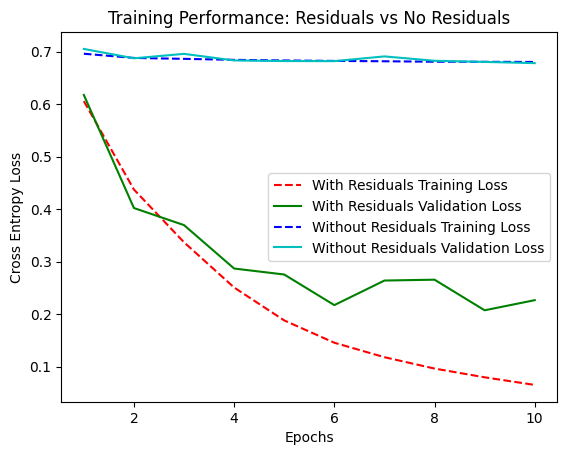

In [5]:
plt.plot(resnet_w_resid["epoch"], resnet_w_resid["training_loss"],  "r--",  label="With Residuals Training Loss")
plt.plot(resnet_w_resid["epoch"], resnet_w_resid["validation_loss"], "g-", label="With Residuals Validation Loss")

plt.plot(resnet_wo_resid["epoch"], resnet_wo_resid["training_loss"],  "b--",  label="Without Residuals Training Loss")
plt.plot(resnet_wo_resid["epoch"], resnet_wo_resid["validation_loss"], "c-", label="Without Residuals Validation Loss")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Training Performance: Residuals vs No Residuals")
plt.show()

Notice above that there was almost no change in the loss when we dont have residuals. This is clear evidence that the model with 101 layers just cannot be optimized with gradient descent. On the other hand, Residuals allowed us to train the model and get great result with an almost 90% accuracy.


That is it! We have learned an important idea that is used constantly in Deep Learning today! This isn't the last time we will be using skip connections as a trick to boost our models performance!